<a href="https://colab.research.google.com/github/Sai-krishna-33/CODSOFT/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



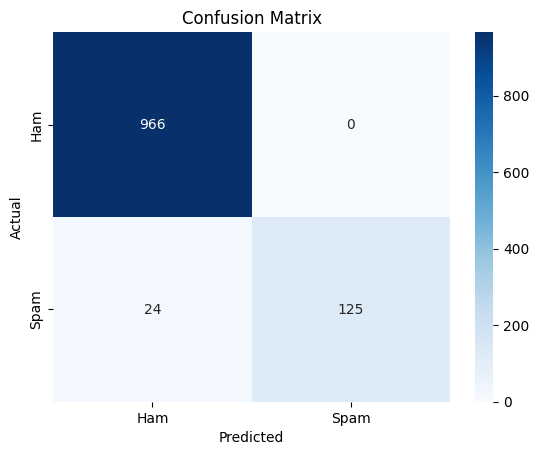

Message: Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.
Prediction: Spam


In [1]:
# spam_sms_detection.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# 2. Encode labels: 'ham' = 0, 'spam' = 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# 4. Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 6. Predictions
y_pred = model.predict(X_test_tfidf)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. Predict custom messages
def predict_message(message):
    msg_tfidf = vectorizer.transform([message])
    prediction = model.predict(msg_tfidf)[0]
    return 'Spam' if prediction == 1 else 'Ham'

# Test the function
test_sms = "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now."
print(f"Message: {test_sms}\nPrediction: {predict_message(test_sms)}")
